In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [2]:

## Cambiar la Ruta para el usuario
df = pd.read_excel(r"C:\Users\marco\Desktop\GitProjects\app_plagio\Excels\results-exam.xlsx")
df.head()

## LIMPIAR DATOS

## Eliminar Columnas innecesarias (Dirección Email, Estado,Iniciado, Finalizado
df = df.drop(["Dirección Email", "Estado", "Iniciado", "Finalizado"], axis= 1)

## Unir nombre y apellido en una columna "Nombre"
Apellidos = df["Apellido(s)"]
df = df.drop(["Apellido(s)"], axis=1)
df["Nombre"] = df["Nombre"] + " " +Apellidos

## Cambiar de nombre las columna (Simplicidad en la lecutura)
df = df.rename(columns={
    'Calificación/20.00': 'Calificación',
    'Q. 1 /2.00': '1',
    'Q. 2 /2.00': '2',
    'Q. 3 /2.00': '3',
    'Q. 4 /2.00': '4',
    'Q. 5 /2.00': '5',
    'Q. 6 /2.00': '6',
    'Q. 7 /2.00': '7',
    'Q. 8 /2.00': '8',
    'Q. 9 /2.00': '9',
    'Q. 10 /2.00': '10',
})

## Eliminar ultima fila (Promedio)
df = df.drop(df.index[-1])

## Funcion para convertir el texto " x mins y segundos" de la columna Duración a un valor entero de segundos
def convertir_segundos(texto):
    datos = texto.split() ## Dividir la cadena de texto por espacios
    minutos = int(datos[0])
    segundo = int(datos[2])
    return minutos*60 + segundo

## Utilizar el metodo apply (tiene como parametro una función) para cambiar el formato a valor entero en la columna "Duración"
df["Duración"] = df["Duración"].apply(convertir_segundos)

## Convertir todas las columnas de tipo float a enteros
df = df.apply(lambda x: x.astype(int) if x.dtype == "float64" else x)

## Mostrar DataFrame
df


,Nombre,Duración,Calificación,1,2,3,4,5,6,7,8,9,10
0,Anderson Molina,528,14,0,2,2,2,2,2,0,2,0,2
1,Fabian Galindo,809,16,0,2,2,0,2,2,2,2,2,2
2,Aldo Carhuapuma,390,16,0,2,2,2,0,2,2,2,2,2
3,Yastin Vasquez,173,6,0,0,2,0,2,0,2,0,0,0
4,Rodrigo Padilla,911,14,0,2,2,0,2,2,2,0,2,2
5,Cesar Omonte,336,20,2,2,2,2,2,2,2,2,2,2
6,Ingrid Bustamante,611,16,2,2,0,2,2,2,2,2,2,0
7,Jesus Tasayco,291,20,2,2,2,2,2,2,2,2,2,2
8,Marco Gentille,582,16,2,2,2,2,2,0,0,2,2,2
9,Alvaro Almeida,549,20,2,2,2,2,2,2,2,2,2,2


0.003909659095497296


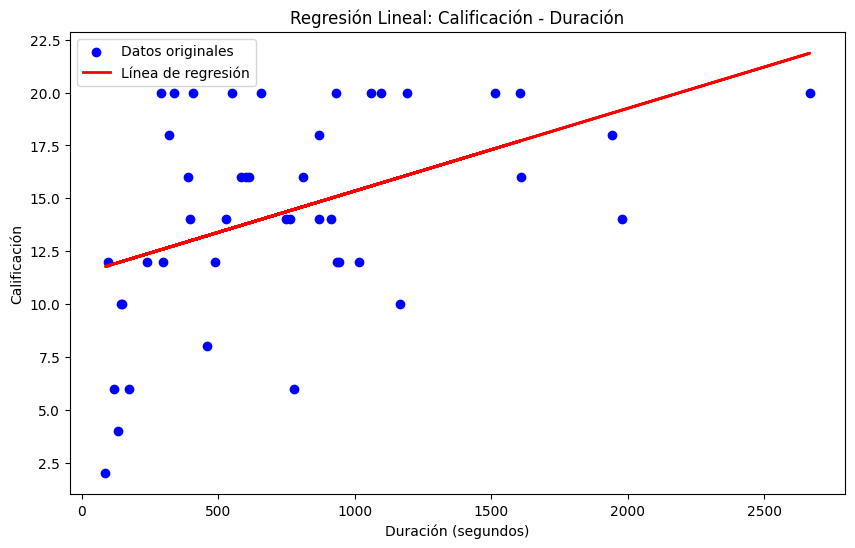

In [5]:

## GRAFICAS PRUEBA

## conseguir los valores de la funcion linea  y  = ax + b  (en este caso obtenemos a y b)
a, b = np.polyfit(df['Duración'], df['Calificación'], 1)

# Forma de la funcion y = ax + b
y_pred = a * df['Duración'] + b

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(df['Duración'], df['Calificación'], color='blue', label='Datos originales')
plt.plot(df['Duración'], y_pred, color='red', label='Línea de regresión', linewidth=2)
plt.title('Regresión Lineal: Calificación - Duración')
plt.xlabel('Duración (segundos)')
plt.ylabel('Calificación')
plt.legend()
print(a)
plt.show()


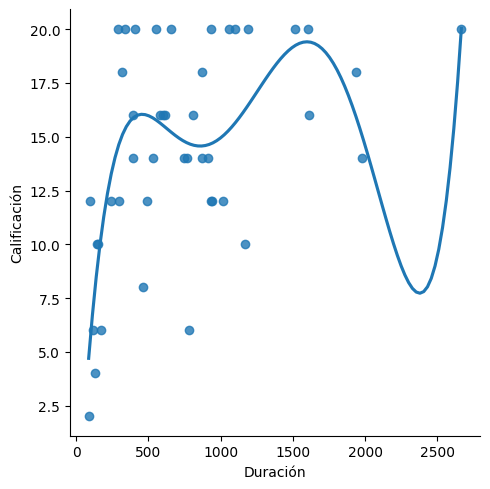

In [ ]:
sns.lmplot(
    data=df,
    x="Duración",
    y="Calificación",
    order=5,  
    ci=None, 
)
plt.show()

In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[['Duración', 'Calificación']]), columns=['Duración', 'Calificación'])

model = IsolationForest(contamination=0.001, random_state=42)
model.fit(df_scaled)

df['Anomalia'] = model.predict(df_scaled)

anomalias = df[df['Anomalia'] == -1]
df

,Nombre,Duración,Calificación,1,2,3,4,5,6,7,8,9,10,Anomalia,Anomalia_0.01,Anomalia_0.05,Anomalia_0.1
0,Anderson Molina,528,14,0,2,2,2,2,2,0,2,0,2,1,1,1,1
1,Fabian Galindo,809,16,0,2,2,0,2,2,2,2,2,2,1,1,1,1
2,Aldo Carhuapuma,390,16,0,2,2,2,0,2,2,2,2,2,1,1,1,1
3,Yastin Vasquez,173,6,0,0,2,0,2,0,2,0,0,0,1,1,1,1
4,Rodrigo Padilla,911,14,0,2,2,0,2,2,2,0,2,2,1,1,1,1
5,Cesar Omonte,336,20,2,2,2,2,2,2,2,2,2,2,1,1,1,1
6,Ingrid Bustamante,611,16,2,2,0,2,2,2,2,2,2,0,1,1,1,1
7,Jesus Tasayco,291,20,2,2,2,2,2,2,2,2,2,2,1,1,1,1
8,Marco Gentille,582,16,2,2,2,2,2,0,0,2,2,2,1,1,1,1
9,Alvaro Almeida,549,20,2,2,2,2,2,2,2,2,2,2,1,1,1,1


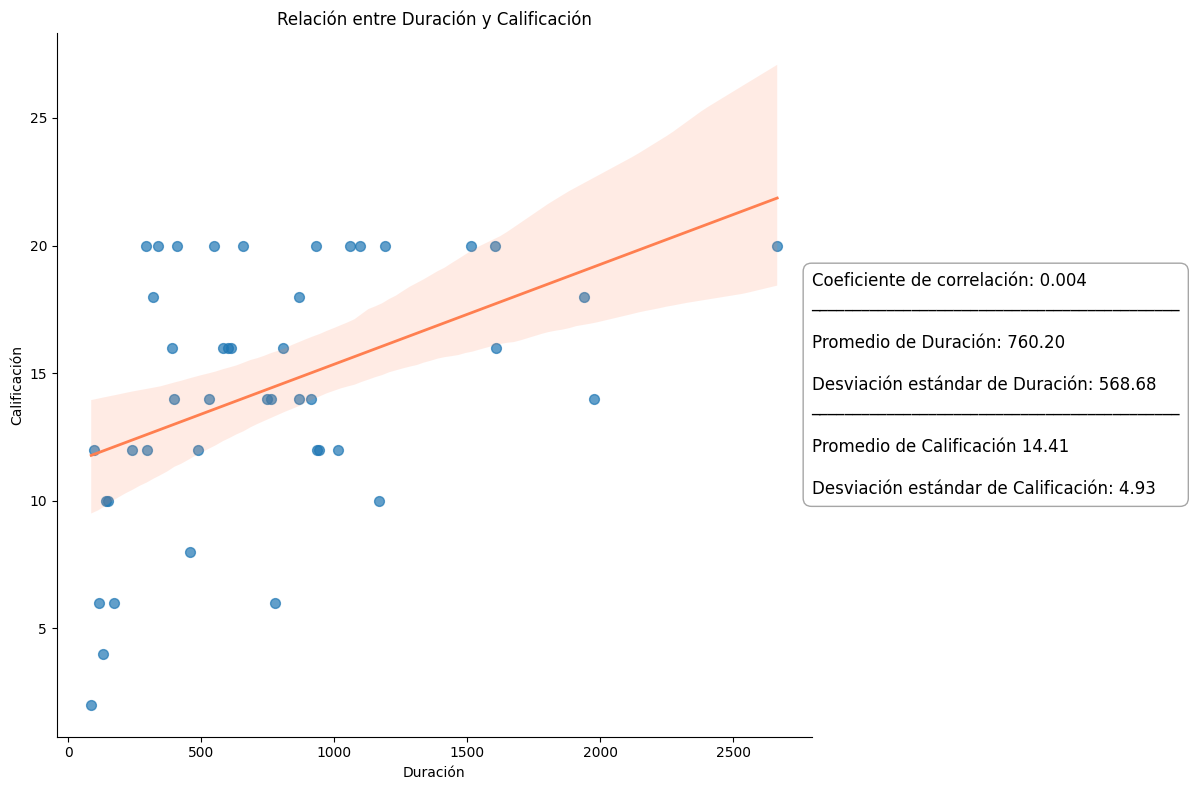

In [40]:

a, b = np.polyfit(df['Duración'], df['Calificación'], 1)
promedio_duracion =  df["Duración"].mean()
desviacion_duracion = df["Duración"].std()
promedio_calificacion =  df["Calificación"].mean()
desviacion_calificacion = df["Calificación"].std()
separacion= "____________________________________________"
informacion = f"""Coeficiente de correlación: {a:.3f}\n{separacion}
    \nPromedio de Duración: {promedio_duracion:.2f}
    \nDesviación estándar de Duración: {desviacion_duracion:.2f}\n{separacion}
    \nPromedio de Calificación {promedio_calificacion:.2f}
    \nDesviación estándar de Calificación: {desviacion_calificacion:.2f}"""  
      
sns.lmplot(
    data=df,
    x="Duración",
    y="Calificación",
    scatter_kws={'s': 50, 'alpha': 0.7},  
    line_kws={'color': 'coral', 'linewidth': 2},  
    height=8,
    aspect=1.5  
)
plt.title("Relación entre Duración y Calificación")
plt.text(
    1, 0.5, informacion, 
    transform=plt.gca().transAxes, 
    fontsize=12, 
    verticalalignment='center', 
    horizontalalignment='left', 
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=0.5')
)
plt.tight_layout()
plt.show()

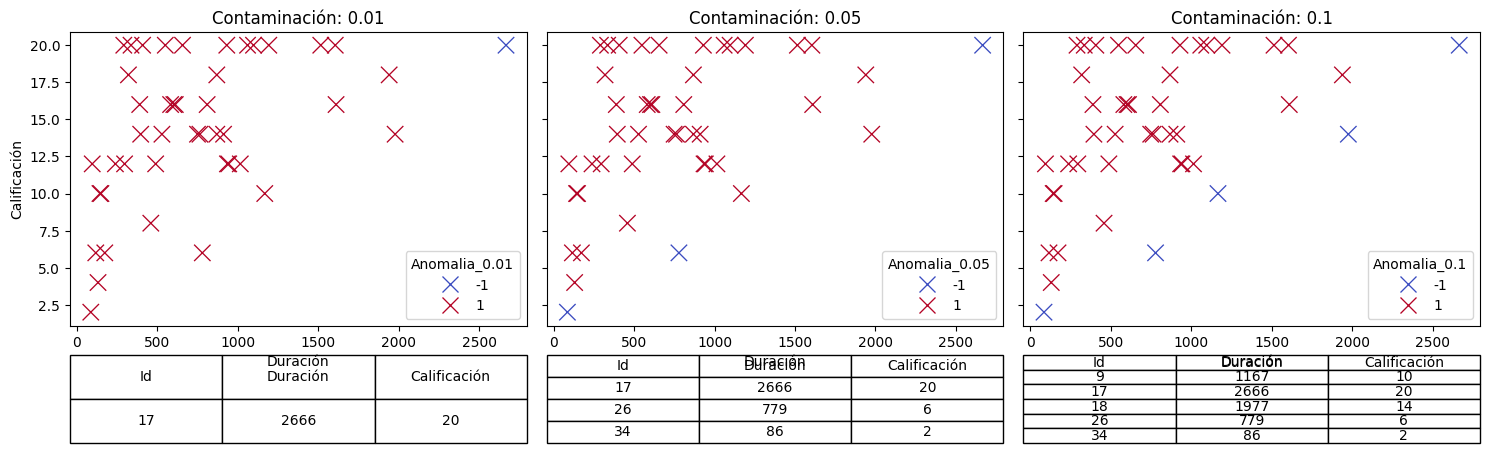

In [43]:
# Normalizar las características 'Duración' y 'Calificación'
df_acciones = pd.read_excel(r"C:\Users\marco\Desktop\LRPD_Estadistica\registro de acciones\RegistrosLimpios.xlsx")

df_ids_unicos = df_acciones[['Id', 'Usuario']].drop_duplicates()

df_total = df_ids_unicos[df_ids_unicos['Usuario'].isin(df['Nombre'])] 
df_total = df_total.merge(df[['Nombre', 'Duración', 'Calificación']], 
                          left_on='Usuario', 
                          right_on='Nombre', 
                          how='inner')

df_total.drop(columns=['Nombre'], inplace=True)

# Normalizar las características 'Duración' y 'Calificación' en df_total
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_total[['Duración', 'Calificación']])

contaminaciones = [0.01, 0.05, 0.1]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for i, cont in enumerate(contaminaciones):
    model = IsolationForest(contamination=cont, random_state=42)
    model.fit(df_scaled)
    
    df_total[f'Anomalia_{cont}'] = model.predict(df_scaled)
    
    sns.scatterplot(
        data=df_total, 
        x='Duración', 
        y='Calificación', 
        hue=f'Anomalia_{cont}', 
        sizes=(20, 200), 
        ax=axes[i], 
        palette='coolwarm',
        marker="x",
        s=140
    )

    axes[i].set_title(f'Contaminación: {cont}')
    axes[i].set_xlabel('Duración')
    axes[i].set_ylabel('Calificación')

    anomalias = df_total[df_total[f'Anomalia_{cont}'] == -1]

    table_data = anomalias[['Id', 'Duración', 'Calificación']] 

    # Añadir la tabla debajo de cada gráfico
    axes[i].table(cellText=table_data.values, 
                  colLabels=table_data.columns, 
                  loc='bottom', 
                  cellLoc='center', 
                  bbox=[0, -0.4, 1, 0.3])

plt.tight_layout()
plt.show()


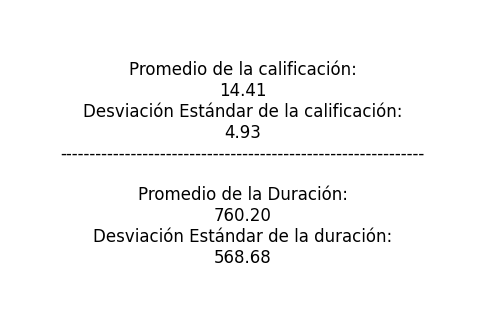

In [36]:

espaciado = "--------------------------------------------------------------"
mean_calificacion = df['Calificación'].mean()  # Promedio
std_calificacion = df['Calificación'].std()    # Desviación estándar

mean_tiempo =  df["Duración"].mean() 
std_tiempo = df["Duración"].std()

fig, ax = plt.subplots(figsize=(6, 4))

text = f"""Promedio de la calificación:\n{mean_calificacion:.2f}\nDesviación Estándar de la calificación:\n{std_calificacion:.2f}\n{espaciado}
\nPromedio de la Duración:\n{mean_tiempo:.2f}\nDesviación Estándar de la duración:\n{std_tiempo:.2f}"""

ax.text(0.5, 0.5, text, fontsize=12, ha='center', va='center', wrap=True)

ax.axis('off')
plt.savefig('estadisticas_calificacion.png', dpi=300, bbox_inches='tight')
plt.show()